Importing libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving FOOD-DATA-GROUP.csv to FOOD-DATA-GROUP.csv/FOOD-DATA-GROUP.csv


In [58]:
df = pd.read_csv('/content/FOOD-DATA-GROUP.csv/FOOD-DATA-GROUP.csv')
df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"
# Drop target as it is not needed in clustering
df = df.drop(target, axis=1)

Column added for feature extraction

In [59]:
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
df['Total Fats'] = df['Polyunsaturated Fats'] + df['Saturated Fats'] + df['Monounsaturated Fats']

Selected features

In [60]:
selected_features = ['Nutrition Density', 'Zinc', 'Vitamin B3', 'Calcium', 'Sodium', 'Dietary Fiber', 'Vitamin C', 'Selenium', 'Protein+Carbohydrates+Fat', 'Total Fats']
X = df[selected_features]

Removing Outliers

<Axes: >

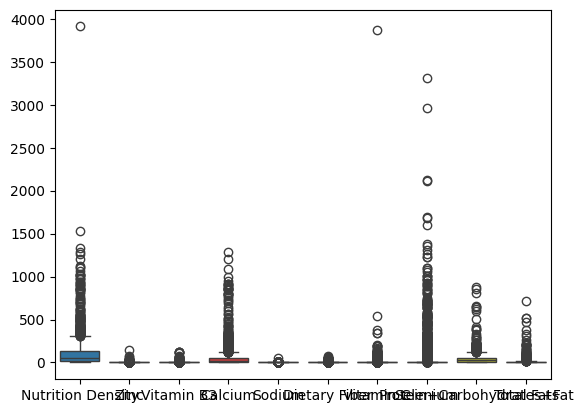

In [61]:
import seaborn as sns
sns.boxplot(X)

In [62]:
from scipy.stats import zscore
z_scores = np.abs(zscore(X))
threshold = 3
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
df_no_outliers = df.loc[X_no_outliers.index]
print(f"Original shape: {df.shape}, Shape after removing outliers: {df_no_outliers.shape}")
X = df_no_outliers[selected_features]

Original shape: (2395, 35), Shape after removing outliers: (2179, 35)


Applying KMeans clustering with optimal k

In [53]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
best_k = 2
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)

Fit KMeans to the refined data

In [67]:
kmeans.fit(X_no_outliers)
df['Cluster'] = np.nan
df.loc[X_no_outliers.index, 'Cluster'] = kmeans.labels_

We are visualizing the clustering, and reducing the data to 2D using PCA (Principal Component Analysis)

In [77]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_no_outliers)

Ploting the 2D projection of the clustered data points

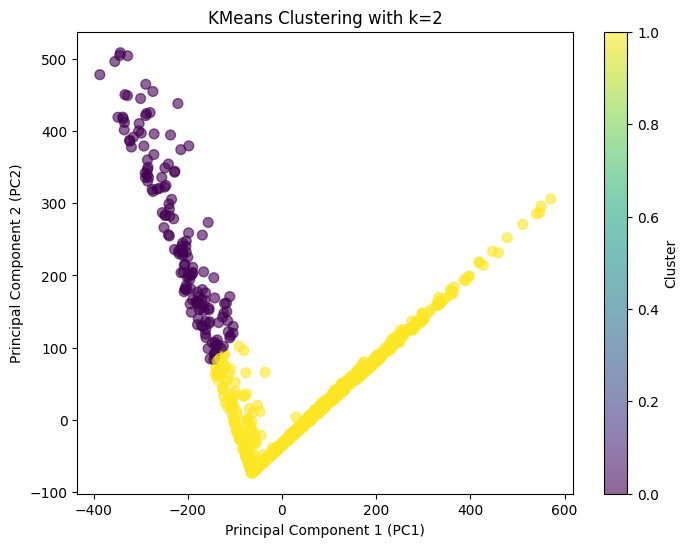

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()


Printing the cluster centers (centroids of each cluster)

In [79]:
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)

Cluster Centers (in original feature space):
[[3.47975197e+01 4.69144737e-02 1.69789474e-01 4.25986842e-02
  2.03427632e-01 3.01710526e+00 2.25559211e-01 3.54784868e+02
  3.11062829e+01 3.79792105e+00]
 [8.26305964e+01 1.11473360e+00 2.18456931e+00 3.98580553e+01
  2.49212136e-01 1.51451307e+00 6.02839122e+00 5.07873360e+00
  3.30166162e+01 6.60210508e+00]]


Checking how many samples belong to each cluster

In [80]:
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0     152
1    2027
Name: count, dtype: int64


Processing cluster method with no of clusters other than 2.

Kmeans with 3

In [81]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)

Fit KMeans to the data

In [82]:
kmeans.fit(X_no_outliers)
df['Cluster'] = np.nan
df.loc[X_no_outliers.index, 'Cluster'] = kmeans.labels_

We are visualizing the clustering, and reducing the data to 2D using PCA (Principal Component Analysis)

In [84]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_no_outliers)

Ploting the 2D projection of the clustered data points

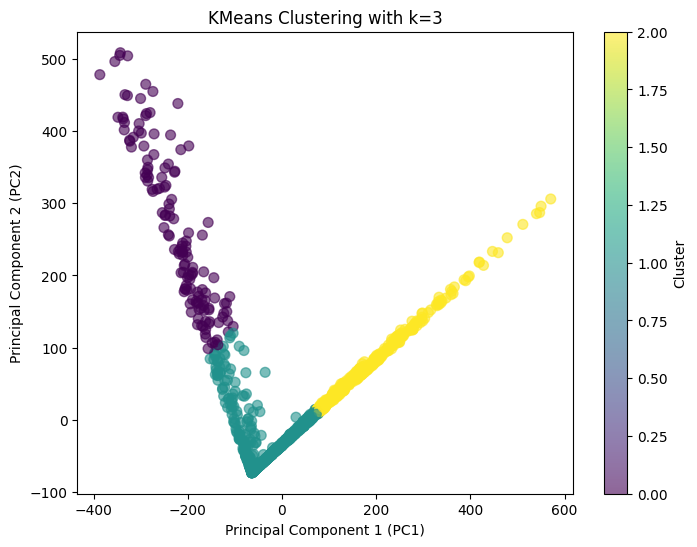

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()


Printing the cluster centers (centroids of each cluster)

In [86]:
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)

Cluster Centers (in original feature space):
[[3.51380563e+01 4.80070423e-02 1.74640845e-01 4.30845070e-02
  2.05781690e-01 3.09718310e+00 2.33000000e-01 3.67021831e+02
  3.13425563e+01 3.75368310e+00]
 [4.49449538e+01 6.85606769e-01 1.45324185e+00 1.68487600e+01
  1.90067692e-01 1.06097169e+00 3.80120738e+00 7.43677600e+00
  2.15456874e+01 4.19370892e+00]
 [2.29990990e+02 2.78099029e+00 5.01847816e+00 1.29644175e+02
  4.80565534e-01 3.31223058e+00 1.46693835e+01 4.86213592e-02
  7.81321626e+01 1.60484248e+01]]


Checking how many samples belong to each cluster




In [87]:
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0     142
1    1624
2     413
Name: count, dtype: int64


Kmeans with 5

In [92]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)

Fit KMeans to the data

In [93]:
kmeans.fit(X_no_outliers)
df['Cluster'] = np.nan
df.loc[X_no_outliers.index, 'Cluster'] = kmeans.labels_

We are visualizing the clustering, and reducing the data to 2D using PCA (Principal Component Analysis)

In [94]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_no_outliers)

Ploting the 2D projection of the clustered data points

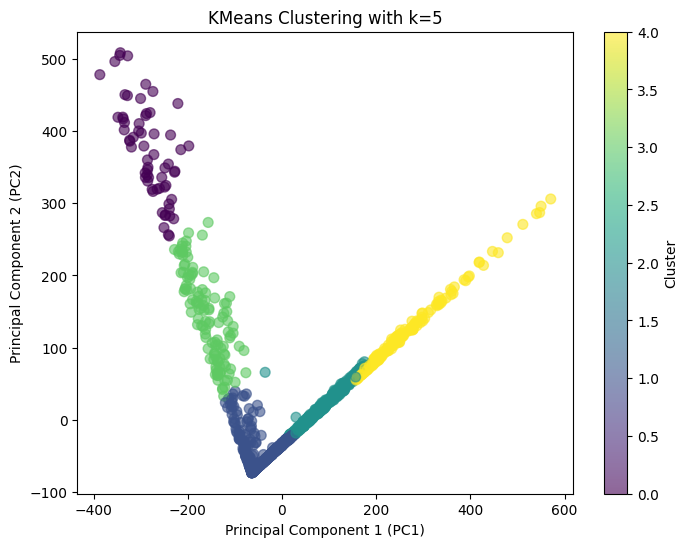

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()

Printing the cluster centers (centroids of each cluster)

In [96]:
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)

Cluster Centers (in original feature space):
[[3.98884032e+01 5.25000000e-02 1.81080645e-01 3.74677419e-02
  1.82677419e-01 3.58548387e+00 2.85774194e-01 4.92719355e+02
  3.56372258e+01 3.99930645e+00]
 [3.06273564e+01 4.83933180e-01 1.10124578e+00 1.18084386e+01
  1.52874808e-01 6.59906298e-01 2.15922734e+00 4.32993856e+00
  1.52738249e+01 3.55037174e+00]
 [1.43091899e+02 2.39576015e+00 4.32545261e+00 5.73735010e+01
  3.95400387e-01 3.01485687e+00 1.26863675e+01 2.70036750e-01
  6.47951741e+01 1.12768395e+01]
 [2.85734167e+01 4.21750000e-02 1.60000000e-01 4.61916667e-02
  2.02400000e-01 2.29416667e+00 1.63750000e-01 2.32403333e+02
  2.56850667e+01 3.15755833e+00]
 [2.97888882e+02 2.18927528e+00 4.23270787e+00 2.00866292e+02
  5.44915730e-01 3.44403933e+00 1.59904494e+01 4.32808989e-02
  7.28960393e+01 1.61807697e+01]]


Checking how many samples belong to each cluster

In [97]:
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0      62
1    1300
2     519
3     120
4     178
Name: count, dtype: int64
